
## Title: Classifying the Stage of Heart Disease of Patient's from Cleveland based on Age, Resting Blood Pressure, Cholesterol, Max Heart Rate.

## Background Information

Heart disease is one of the leading causes in death across the United States of America. Heart disease can result in a broad range of negative health impacts, and can be caused by a wide variety of factors. Common heart diseases include coronary heart disease, arrhythmias, strokes, etc. Throughout the 21st century, medical professionals have deduced how certain factors may give leeway to one having a certain type of heart disease and the extent of its danger to the human body (Centers for Disease Control and Prevention, 2023). In this project, we will try to predict the severity of heart attack given several relevant predictors. The dataset being used is a collection of patients from Cleveland, Ohio, all of whom were suspected to have heart disease. The dataset contains 76 attributes which act as predictors as to the severity of one’s heart disease. For the purpose of this investigation, only age, cholesterol, number of vessels coloured, resting blood pressure, and max heart rate will be used to predict the severity of heart disease. The class being used determines if the patient is classified as either healthy, moderate or severe in regards to their health. 

Research Question: How can age, resting bp, chol, and chest pain be used to determine the stage of heart disease of patients from Cleveland?

In [9]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(tidymodels)

Below, we read in our dataset and manually set the column names and types according to the source of the dataset.

In [12]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                           col_types = list("d", "d", "d", "d", "d","d", "d", "d", "d", "d", "d", "f", "f", "d")) 
# cleveland_data

The rightmost column (num) will represents the labels for this model. It represents the degree of artery blockage in the patient. According to the source, 0 represents no blockage and 5 represents major blockage. We replce num with a column that buckets these values into categories "Healthy" for 0, "Early" for 1, "Medium" for values 2-3, and "Late" for 4-5. We call this column "stage". We then select the necessary columns and split the data into our training and testing splits.

In [17]:
set.seed(69)

cleveland_data <- cleveland_data |> 
    mutate(stage = cut(num, breaks=c(-Inf,0,2,5), labels=c("Healthy","Moderate","Severe"))) |>
    select(age, trestbps,chol,thalach,stage) 

# Splitting into training and testing sets 
split <- initial_split(cleveland_data, prop=0.75, strata = stage)
data_training <- training(split)
data_testing <- testing(split)

head(data_training)

age,trestbps,chol,thalach,stage
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,Healthy
37,130,250,187,Healthy
57,120,354,163,Healthy
57,140,192,148,Healthy
44,120,263,173,Healthy
52,172,199,162,Healthy


Using the training data, we made several plots to find any potential relationships. The most notable ones are shown below.

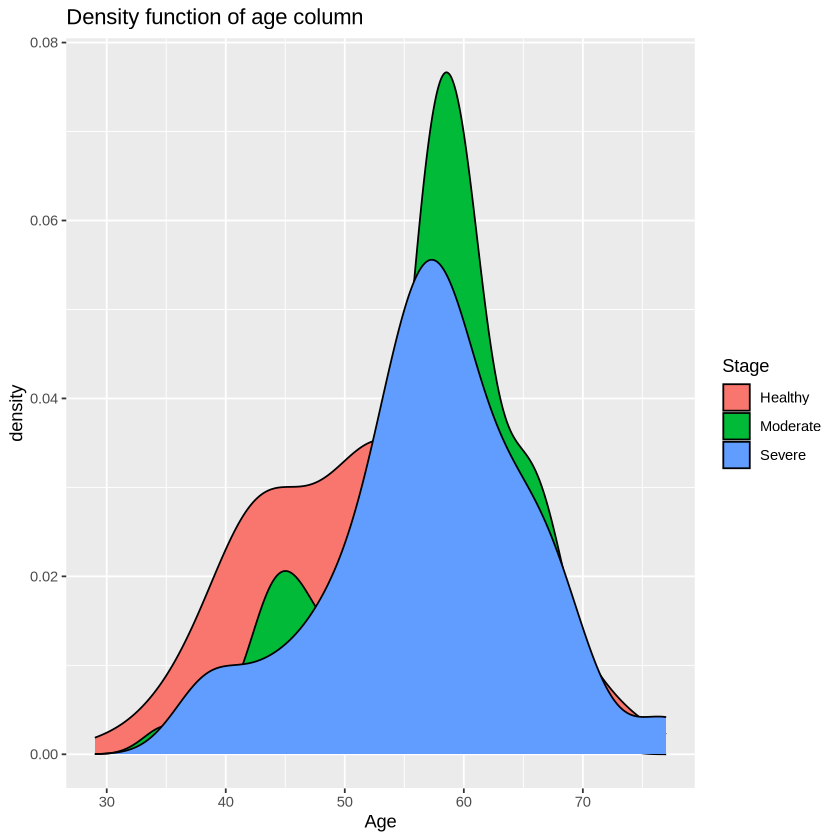

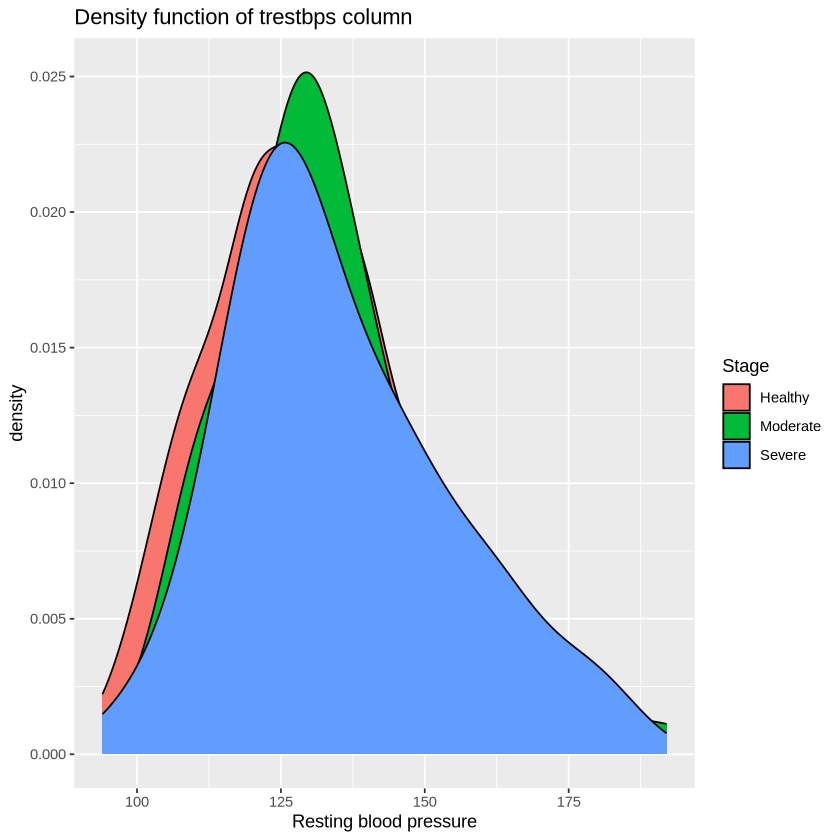

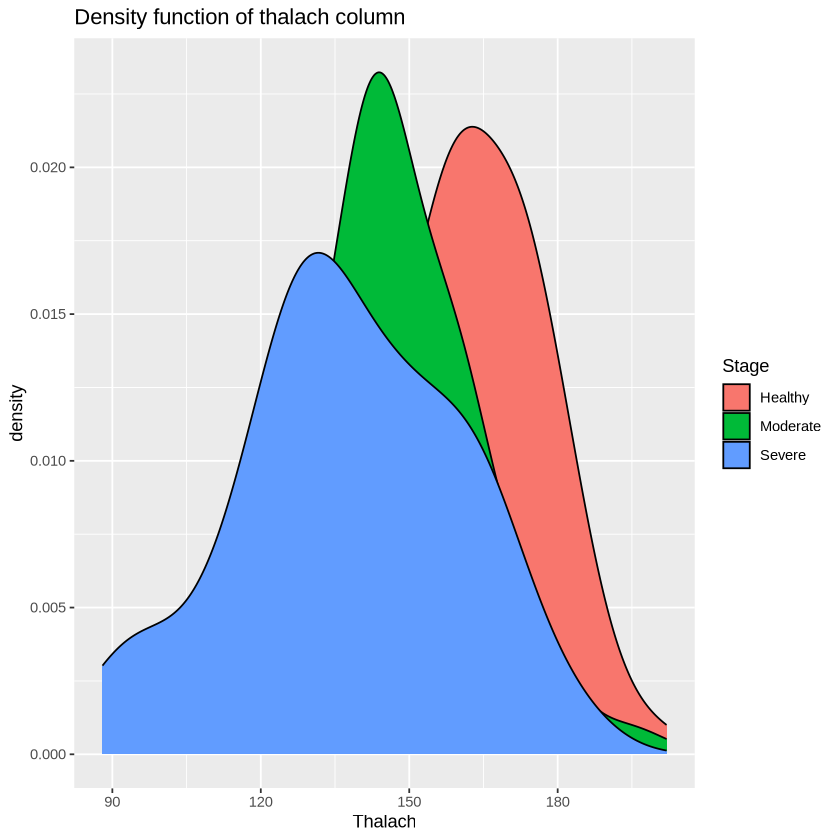

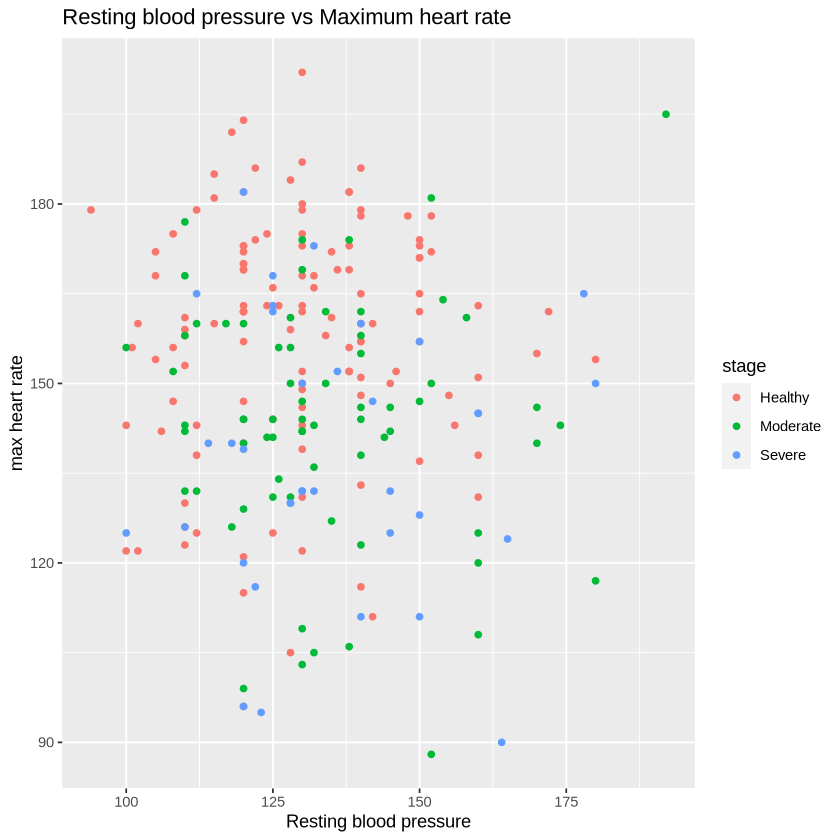

In [18]:
age <- ggplot(data_training, aes(x = age, fill = stage)) + #not much separation
    geom_density() +
    ggtitle("Density function of age column") +
    labs(x = "Age", fill="Stage")
age

tresbps <- ggplot(data_training, aes(x = trestbps, fill = stage)) + #not much separation
    geom_density() +
    ggtitle("Density function of trestbps column") +
    labs(x = "Resting blood pressure", fill = "Stage")
tresbps


thalach <- ggplot(data_training, aes(x = thalach, fill = stage)) + #not much separation
    geom_density() +
    ggtitle("Density function of thalach column") +
    labs(x = "Thalach", fill = "Stage")
thalach

bp_vs_maxhr <- ggplot(data_training, aes(x = trestbps, y = thalach)) + #good separation
    geom_point(aes(colour = stage)) +
    ggtitle("Resting blood pressure vs Maximum heart rate") +
    labs(x = "Resting blood pressure", y = "max heart rate", fill = "Stage")
bp_vs_maxhr

Based on these plots, we can infer what predictors to use. However, there are other properties of the data we need to consider. Below we count the number of NA values and determine how balanced the classes are.

age,trestbps,chol,thalach,stage
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


stage,count
<fct>,<int>
Healthy,123
Moderate,68
Severe,36


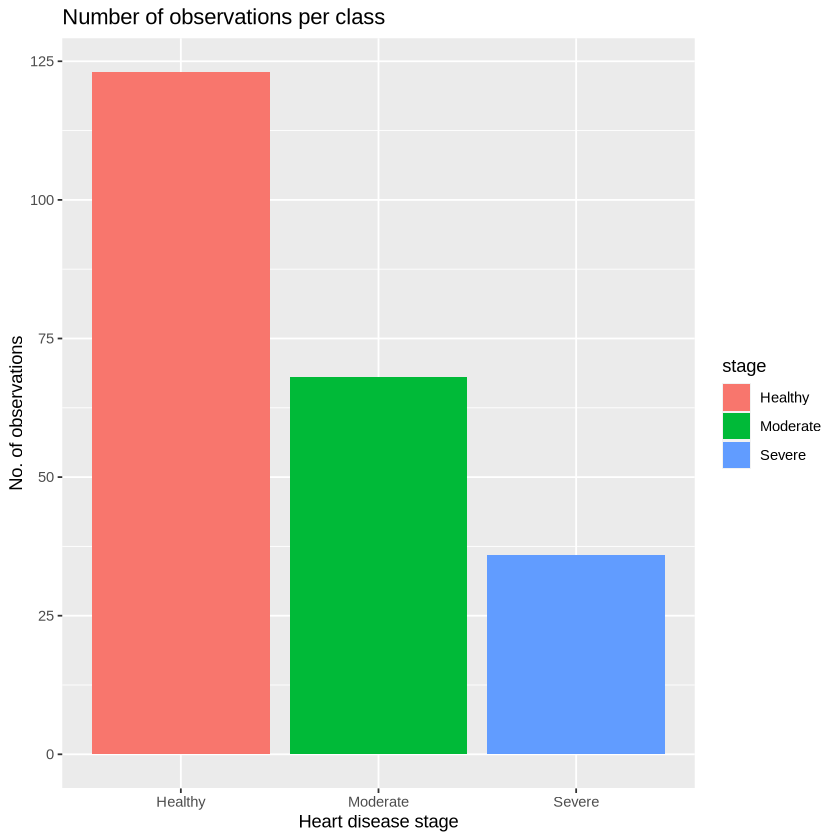

In [19]:
nulls <- data_training |> map_df(\(c) sum(is.na(c)))
nulls

balance <- data_training |> group_by(stage) |> summarize(count = n()) 
balance

balance_plot <- ggplot(balance,aes(x = stage, y = count, fill = stage)) +
    geom_bar(stat = "identity") +
    ggtitle("Number of observations per class") +
    labs(x = "Heart disease stage", y = "No. of observations")
balance_plot

Thankfully, there are no NA values in any of the columns which means our cleaning was successfully. However, there is quite a severe imbalance in classes. There are significantly more observations classified as "Healthy" than the other 3 classes. This means we will most likely need to upsample the other minority classes during training.

In [22]:
cleveland_summary <- cleveland_data |>
    group_by(stage) |>
    summarize(across(age:thalach, mean)) 
cleveland_summary

stage,age,trestbps,chol,thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Healthy,52.58537,129.2500,242.6402,158.3780
Moderate,56.42857,133.6264,253.1319,141.8352
Severe,57.00000,136.3542,248.3333,134.3750


## Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. *Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*
- Describe at least one way that you will visualize the results

To decide on our predictors, we used density plots to visualize the distribution of the classes with respect to that predictor's value. We also used scatterplots to determine any overlap or relationship between potential predictors.

## Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

## Expected Outcomes and significance 

We expect to find that older patients, patients with higher heart rate, patients with higher cholesterol levels, patients with higher max heart rate, patients with more than 3 vessels colored, and patients with type 4 chest pain, are more likely to have a more severe stage of heart disease. In general, older patients and patients with higher cholesterol are more at risk of heart disease; additionally, when we were discovering which factors correlate the most with higher stage heart disease, we found that these other factors are essential. 

If we figure out the correlation, then we might be able to diagnose patients with heart disease earlier, thus allowing us to take early action and prevention to treat heart disease. This could lead to autonomous diagnoses of disease, where people can run tests for themselves to figure out if they are more at risk of heart disease, without necessarily needing the presence of a doctor, which can be both expensive and time consuming. Additionally, having a second automated process to double check diagnoses can help catch missed cases.

How can we use commonly accessible factors to ensure earlier detection of late stage severe cases of heart disease? Which factors are most important when looking into the correlation between heart disease? 


# Bibliography 

Centers for Disease Control and Prevention. (2023, May 15). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.